In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

file_one = "raw-data/Whiskey_Advocate_All_scraped.csv"

In [4]:
# import urllib.request
# response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
# html = response.read()
# print(html)

df = pd.read_csv(file_one, encoding="ISO-8859-1").set_index('row')
df

,name,name_short,year,age,ABV,American,Blended,Bourbon,Canadian,Flavored,...,Scotch,Single Blended Grain,Single Blended Malt,World,review.point,price,currency,style,description,country
row,,,,,,,,,,,,,,,,,,,,,
1,"Johnnie Walker Blue Label, 40%",Johnnie Walker,NaN,NaN,40.00%,False,True,False,False,False,...,True,False,False,False,97,225,$,Blended Scotch Whisky,"Magnificently powerful and intense. Caramels, ...",UK
2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Black Bowmore,1964.0,42 year old,40.50%,False,False,False,False,False,...,True,False,True,False,97,4500,$,Single Malt Scotch,What impresses me most is how this whisky evol...,UK
3,"Bowmore 46 year old (distilled 1964), 42.9%",Bowmore,NaN,46 year old,42.90%,False,False,False,False,False,...,True,False,True,False,97,13500,$,Single Malt Scotch,There have been some legendary Bowmores from t...,UK
4,"Compass Box The General, 53.4%",Compass Box,NaN,NaN,53.40%,False,True,False,False,False,...,True,False,True,False,96,325,$,Blended Malt Scotch Whisky,With a name inspired by a 1926 Buster Keaton m...,UK
5,"Chivas Regal Ultis, 40%",Chivas,NaN,NaN,40.00%,False,True,False,False,False,...,True,False,True,False,96,160,$,Blended Malt Scotch Whisky,"Captivating, enticing, and wonderfully charmin...",UK
6,"Gold Bowmore, 1964 vintage, 42.4%",Gold Bowmore,1964.0,NaN,42.40%,False,False,False,False,False,...,True,False,True,False,96,6250,$,Single Malt Scotch,Deep gold color. Surprisingly lively on the no...,UK
7,"Bowmore, 40 year old, 44.8%",Bowmore,NaN,40 year old,44.80%,False,False,False,False,False,...,True,False,True,False,96,11000,$,Single Malt Scotch,"Definitely showing its age, but not in a bad w...",UK
8,"The Dalmore 50 year old, 52.8%",The Dalmore,NaN,50 year old,52.80%,False,False,False,False,False,...,True,False,True,False,96,"1,500",$,Single Malt Scotch,The Dalmore is one of a handful of whiskies th...,UK
9,"Glenfarclas Family Casks 1954 (Cask #1260), 47.2%",Glenfarclas,1954.0,NaN,47.20%,False,False,False,False,False,...,True,False,True,False,96,"3,360",$,Single Malt Scotch,A rich amber color and elegantly oxidized note...,UK


In [5]:
# soup = BeautifulSoup(html,'html5lib')

text=df["description"].str.cat(sep=' ').lower()
text=text.replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# print(df["description"])
# s.str.cat(sep=' ')
# text = soup.get_text(strip = True)
print(text)

magnificently powerful and intense caramels dried peats elegant cigar smoke seeds scraped from vanilla beans brand new pencils peppercorn coriander seeds and star anise make for a deeply satisfying nosing experience silky caramels bountiful fruits of ripe peach stewed apple orange pith and pervasive smoke with elements of burnt tobacco an abiding finish of smoke dry spices and banoffee pie sweetness close to perfection editors choice what impresses me most is how this whisky evolves its incredibly complex on the nose and palate this is a thick viscous whisky with notes of sticky toffee earthy oak fig cake roasted nuts fallen fruit pancake batter black cherry ripe peach dark chocolate-covered espresso bean polished leather tobacco a hint of wild game and lingering leafy damp kiln smoke flavors continue on the palate long after swallowing this is what we all hope for and dream of in an older whisky there have been some legendary bowmores from the mid-60s and this is every bit their equal

In [136]:
clean_text=text.split(" ")
print(clean_text[0:6])

['magnificently', 'powerful', 'and', 'intense', 'caramels', 'dried']


In [138]:
sr= stopwords.words('english')
newStopWords = ["'s","whiskey","whisky"]
sr.extend(newStopWords)
for word in clean_text:
    if word in stopwords.words('english'):        
        clean_text.remove(word)

In [6]:
tokens=[]
for word in text.split():
    tokens.append(word)
print(tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))


magnificently:2
powerful:67
intense:122
caramels:71
dried:707
peats:8
elegant:112
cigar:85
smoke:1046
seeds:26
scraped:3
vanilla:1979
beans:24
brand:40
new:478
pencils:4
peppercorn:63
coriander:45
star:50
anise:137
make:175
deeply:10
satisfying:57
nosing:11
experience:63
silky:147
bountiful:3
fruits:867
ripe:406
peach:240
stewed:127
apple:666
orange:943
pith:50
pervasive:2
elements:58
burnt:142
tobacco:295
abiding:2
finish:2950
dry:711
spices:960
banoffee:18
pie:176
sweetness:650
close:43
perfection:6
editors:39
choice:55
impresses:6
whisky:1727
evolves:19
incredibly:35
complex:368
nose:2064
palate:2130
thick:217
viscous:68
notes:2005
sticky:54
toffee:917
earthy:225
oak:2321
fig:105
cake:169
roasted:231
nuts:251
fallen:12
fruit:1634
pancake:7
batter:20
black:553
cherry:311
dark:672
chocolate-covered:44
espresso:58
bean:35
polished:247
leather:446
hint:684
wild:46
game:12
lingering:196
leafy:22
damp:114
kiln:32
flavors:742
continue:21
long:666
swallowing:8
hope:11
dream:3
older:108
lege

confident:25
cereal:124
11:30
complex?:2
powerhouse:4
glints:4
bosky:3
meatâmutton:1
venisonâplus:1
graphite:4
stone:49
bovril-like:1
feral:4
dimensions:4
seems:89
blunt:6
instrumentâ:1
â£180500:1
ml:121
ellen:30
holding:5
rooty:10
tarry:43
rope:21
shellfish:2
diesel:3
fumes:4
ocean:5
patiently:1
debate:4
ushered:1
return:18
dropping-off:2
expressiveness:1
yes:53
over-oaked:12
ellen?:1
counter:5
sensation:11
overt:25
fishiness:1
chilled:7
cucumber:6
difference:12
numb:3
spot:22
wasabi-like:2
coupled:10
soon:31
stands:9
creature:1
lagoon:1
covered:7
balls:13
draped:9
encrusted:1
barnacles:1
clams:2
clutching:1
kipper:3
spreads:8
across:62
drifts:5
complexâ¦and:1
scant:1
globe:1
us]:1
â£280:2
scarcity:1
market:52
driven:14
prices:4
either:31
buddy-up:1
guy:3
club:25
try:47
interaction:4
skeletal:1
cashew:8
tansy:2
stage:7
expanding:2
classically:2
killer:6
sixteenth:2
breeze:13
2900:1
1979:4
17th:2
fresh-mown:2
tweed:16
meat:34
mouth-drying:14
2988:1
aromas-especially:1
coconuts:1
e

sootiness:2
turn:32
mingles:9
dominates:35
farewell:3
pair:12
leads:33
szechuan:5
detonation:1
gunpowdery:1
eel:3
grunt:2
committee:1
limited-edition:15
grooves:1
bonfires:5
arran:33
9000:11
auchentoshan:32
auchentoshans:2
lowland:43
muffins:17
balblair:20
1995:18
outlets:10
naturally:5
carnations:4
bonbons:18
liter:25
olds:10
defined:11
thrown:9
balvenies:2
shown:8
spades:1
newbie:1
replacement:4
market-specific:1
1401:2
larger:7
liters:3
eclectic:1
ranging:6
substance:12
blossommanuka:1
edged:2
woods:19
frangipane:2
rippling:5
awfully:1
ultimate:5
portwood:9
476%:1
eleven:7
8850:1
#3434:1
162:4
39:2
jujubes:5
merest:3
persistently:7
225:4
$160:3
anymore:1
replaces:17
wears:2
adore:5
flavored:38
tar-tinged:1
naked:5
vaults:2
lives:6
enthusiasts:8
creeping:3
closely:4
adam:1
hannett:1
assembly:1
december:13
1986:4
hoggies:3
wilting:1
spinach:1
breezes:7
mood:10
clearly:33
lean:15
bearing:3
oilskins:2
barely:16
crab:4
shells:26
retronasally:1
pea:6
normal:6
pine-scented:4
juniper:17
bel

sawn:12
auchroisk:3
pronounce:3
correctly:2
oth:1
rusk:1
interested:3
singleton:13
prefix:2
hijacked:2
glendullan:6
forgotten:6
mavens:1
j&b:3
stable:5
favor:4
spiffing:1
retro:1
redress:1
max:2
beneath:11
nuttycereal:1
sawdust:24
needling:2
numbs:1
fragmented:2
careful:8
spinoff:1
sizeable:2
environmental:2
feather:2
speyburn:6
aimed:3
markets:8
unravels:2
slender:2
delectable:5
goodness:10
evenly:4
patties:1
detectable:1
softness:13
perceptibly:2
incorporating:3
whisper:6
reprise:3
sliding:1
skillet:2
uppers:1
oxfords:1
1975:8
rested:2
balsamic:13
1812:1
float:5
metaphorically:1
skip:1
denny:1
package:14
focused:19
call:9
thoughâ¬36:1
gulf:1
palm:5
west:30
coast:21
prevailing:2
sunny:9
climate:5
influenced:5
lochranza:1
brushed:3
slurping:2
boutique-y:6
terrifically:2
medium-weight:5
toe-to-toe:3
em:2
370:1
eye:6
grumble:1
good-quality:1
gloopy:2
lashings:7
dregs:1
salvation:2
â£148:4
pronounced:28
doo:1
rugged:10
andor:6
temperate:1
consortium:1
cards:3
lines:3
665:1
â£140:4
scally

flour:10
sherry-forward:2
hang:2
walmart:2
decline:1
resulted:2
ale:29
confounds:2
expectations:2
zings:1
vying:1
gustier:1
seat:3
unlike:19
hide:3
spiritâ:1
10-12:1
non-vintage:3
$30:4
approval:1
whispering:1
relax:2
midas:1
skills:3
alchemy:1
bootâ:1
feelings:2
recorded:3
answers:1
stellar:5
oloroso-forward:1
olds?:1
kola:6
kubes:5
bitter-lemon:1
lumpy:1
miami:1
national:3
scratched:1
penetration:1
wedge:4
scratch:2
pecking:1
tips:3
pulpy:1
collaborates:1
dovetailing:3
antithesis:7
weather:5
cultivated:1
4890:1
mentioned:4
perspective:5
20-30:1
valinch:3
metal:2
tube:2
newly-planed:1
liqueur-like:13
springwood:1
â¬42:2
applesauce:8
295:3
â£63500:1
arena:3
wineâ:1
guess:8
respectively:1
venture:4
reflection:1
acacia:2
stickiness:4
â£1300:1
replicate:1
1882:2
700:2
starch:5
sounds:5
disease:1
dinner-given:1
amberruby:2
heartiest:1
pre-60s:1
raymond:1
armstrong:1
wood-dry:1
nationwide:5
aroma-it:1
review:11
required:3
bison:1
reeds:2
brambles:2
mid-priced:1
unconventional:5
farmyard-li

asterism:1
haylofts:1
intermingle:1
experienceâ:2
marvelous:2
telephone:1
fruit-led:1
caresses:1
marking:2
perception:2
pinching:1
periphery:2
red-skinned:1
dalliance:1
2554:1
warns:2
wood-whelmed:1
underlay:2
hotter:11
carameltoffee:1
underneathâ¦only:1
$200:1
light-colored:1
crumpets:1
groves:2
smudge:1
daysâ:1
treads:1
tasmania:10
amrut:17
penderyn:9
hasntâ¦yet:1
momentum:2
faster:1
founders:1
clash:3
convincing:1
adnams:3
fearless:1
winners:1
repeat:2
tastiness:1
realized:4
talented:2
jalapeã±o:10
bell:3
buoyed:2
relenting:1
auraâ:1
veecont:1
viscount:1
resounds:1
cordials:1
apricotsâ:1
milestone:1
finnish:1
scrunched:1
converges:1
prismatically:1
haymow:1
planks:2
pedestrian:1
flaws:10
disappointing:8
$120:3
international:1
860677-0473:1
lite:1
peaky:1
fractured:2
fermented:6
mascarpone:1
splurge:1
forbiddingâ:1
plateau?:1
reflect:2
resiny:2
underlain:2
unbalanced:5
nicely-made:1
whiskyâ¦but:1
dish:2
all?:1
potentialâ:1
price31:1
belgiumâ¬31:1
employing:1
nervous:1
accident:1


fake:1
carried:2
nocino:1
smoke-fired:1
erodes:1
teeling:5
alex:2
chasko:2
predict:2
irishness:2
placeholder:1
whooshes:1
woodruff:1
marjoram:2
tonic:2
poitn:1
paupers:1
illegally:1
definitions:1
patchy:1
potatoes:3
squeezins:1
beams:4
great-grandfathers:1
dant:2
credibility:1
grassy-fresh:1
ofâ¦canadian:1
heftier:1
pre-prohibition:1
dandelion:1
1900s:1
rawness:1
cooked-oat:1
inappropriate:2
backs:1
whiskey-its:1
whining:1
redbreast:10
roger:1
comfortably:2
rumor:1
60th:1
parisian:1
gateaux:1
faithful:1
540:1
â¬490:1
bushmills:16
magnum:1
opus:1
mystique:1
browned:2
wonders:3
wowâthe:1
foray:1
port-wood:1
dair:1
ghaelach:1
switch:1
felled:1
kilkenny:1
bluebell:1
clamor:1
collides:2
vociferously:1
trumps:1
deflect:1
anvil:1
stave:4
castanea:1
sativa:1
porosity:1
breakdown:1
products:4
rangeâ¬69:1
limited-release:2
immersive:1
whiskeyprice:1
$600:1
availability-around:1
400:3
statesâ:1
irish-ness:1
rocky:2
climbed:2
ring:3
upstarts:1
boss?:1
frisky:4
puppies:1
useditors:1
primal:1


mesquite-smoked:2
garryana:3
northwest:2
limits:1
agent:1
ashiness:2
moreishâa:1
newton:1
jos:1
inventive:1
rum-cask:1
caramel-banana:1
lotion:1
kheer:1
propel:1
accomplishes:1
chiffon:2
citrusâclementine:1
yuzuâtingling:1
whiskyfest:1
virginia-made:1
portâ¦after:1
boomerang:1
port-edged:1
roastedâ:1
hopi:1
bourbonâsweet:1
mapleâbut:1
cinnamonallspice:1
embellishing:1
tie:1
samuel:4
adams:4
bock:1
utopias:2
drown:1
spicy-medicinal:1
wrap-up:1
cinnamon-spiked:1
unite:1
non-kentucky:1
trepidation:1
chicory-coffee:1
convincingly:1
lineage:1
fruitâpapaya:1
grapeâshows:1
291:1
55-60:1
fruitâespecially:1
peachesâwhite:1
iced-tea:1
oakâa:1
aromasâpeach:1
nougatâcommingle:1
shortchange:1
whiskeyâit:1
pinesap:1
mesquite-grilled:1
fremont:2
mischief:2
spice-vanilla:1
canadian-mellow:1
floralgrassy:1
arching:1
islay-reminiscent:1
crowding:1
overtop:1
small-barrel:12
spec:1
scrub:2
brimstone:1
medicinally:1
furiously:1
madly:1
billed:1
well-knit:1
circling:2
beholder:1
p

In [8]:
freq.plot(15, title='Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)






<Figure size 640x480 with 1 Axes>

In [9]:
df['style'].unique()

array(['Blended Scotch Whisky', 'Single Malt Scotch',
       'Blended Malt Scotch Whisky', 'Grain Scotch Whisky',
       'Single Grain Whisky', 'Irish Blended Whiskey',
       'Blended Irish Whiskey', 'American Blended Whiskey',
       'Blended French Whisky', 'English Blended Whisky',
       'Blended Belgian Whisky', 'Single Grain Irish Whiskey',
       'Single Grain Belgian Whisky', 'French Whisky',
       'Single Malt Swedish Whisky', 'Single Malt English Whisky',
       'Single Malt American Whiskey', 'Unspecified Single Malt',
       'Single Malt French Whisky', 'Single Malt Finnish Whisky',
       'Single Malt Belgian Whisky', 'Japanese', 'Indian Whisky',
       'Taiwanese Whisky', 'Dutch', 'Welsh Whisky', 'Australian Whisky',
       'World Whisky', 'Austrian Whisky', 'Swiss', 'Belgian Whisky',
       'English Grain Spirit', 'Danish', 'Spanish Whisky',
       'Liechtenstein', 'New Zealand', 'Netherlands Whisky',
       'South African Whisky', 'Italian',
       'Icelandic Whisky a

In [10]:
result = dict()
for word, frequency in freq.most_common(20):
    result[word] = frequency
print(result)

{'finish': 2950, 'oak': 2321, 'palate': 2130, 'nose': 2064, 'sweet': 2019, 'notes': 2005, 'vanilla': 1979, 'whisky': 1727, 'fruit': 1634, 'chocolate': 1239, 'spice': 1187, 'old': 1152, 'malt': 1098, 'smoke': 1046, 'caramel': 997, 'cinnamon': 977, 'spices': 960, 'sherry': 958, 'whiskey': 951, 'year': 945}


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

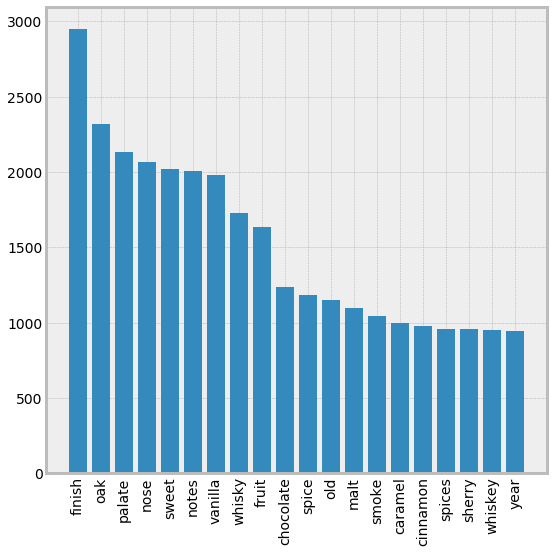

In [63]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(8,8), facecolor="white")
plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)), list(result.keys()), rotation='vertical', color="black")
plt.yticks(color="black")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4755 entries, 1 to 8249
Data columns (total 24 columns):
name                    4755 non-null object
name_short              4755 non-null object
year                    776 non-null float64
age                     1852 non-null object
ABV                     4729 non-null object
American                4755 non-null bool
Blended                 4755 non-null bool
Bourbon                 4755 non-null bool
Canadian                4755 non-null bool
Flavored                4755 non-null bool
Irish                   4755 non-null bool
Japanese                4755 non-null bool
Other                   4755 non-null bool
Rye                     4755 non-null bool
Scotch                  4755 non-null bool
Single Blended Grain    4755 non-null bool
Single Blended Malt     4755 non-null bool
World                   4755 non-null bool
review.point            4755 non-null int64
price                   4755 non-null object
currency            

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

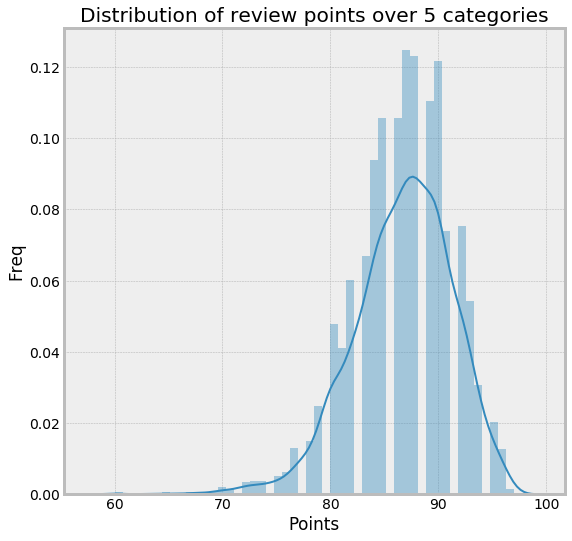

In [73]:
plt.figure(figsize=(8,8), facecolor="white")
# plt.bar(df['style'], height=df['review.point'])
sns.distplot(df['review.point'])
plt.style.use('bmh')
plt.title('Distribution of review points over categories',color="black")
plt.xlabel('Points', color="black")
plt.ylabel('Freq', color="black")
plt.xticks(color="black")
plt.yticks(color="black")

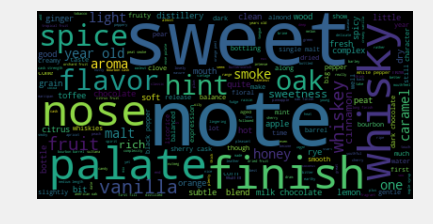

In [155]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(clean_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

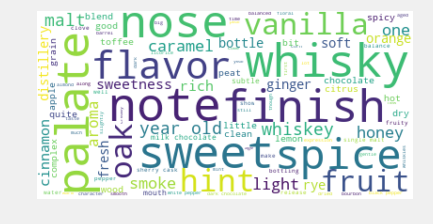

In [153]:

wordcloud = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0, 0.5, 'Review Score (overall mean: 86)')

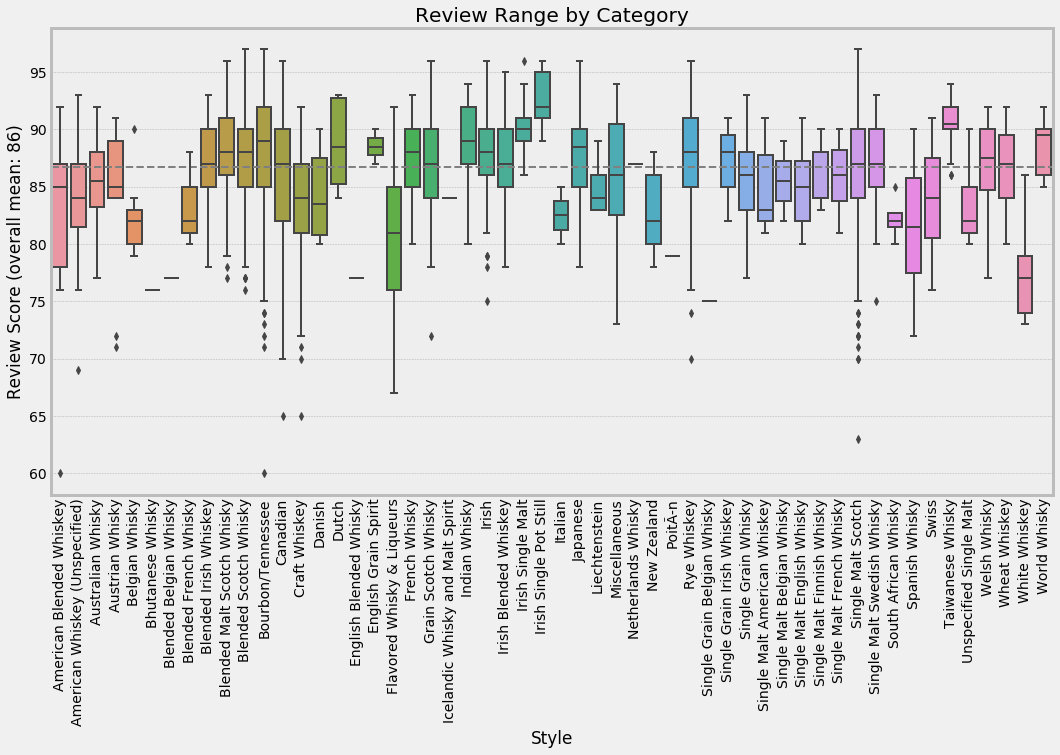

In [120]:
meanrounded=int(df['review.point'].mean())
df=df.sort_values(by=['style'])
plt.figure(figsize=(16,8))
p=sns.boxplot(df['style'],df['review.point'])
plt.title("Review Range by Category", color="black")
plt.xlabel('Style', color="black")
plt.yticks(color="black")
plt.xticks(rotation=90, color="black")
plt.hlines(df['review.point'].mean(), -1, df['review.point'].count(), colors='grey', linestyles='dashed', data=None)
plt.ylabel('Review Score (overall mean: ' + str(meanrounded) + ')', color="black")

